In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix

from matplotlib import cm

In [2]:
plt.rcParams['figure.figsize'] = (13, 13)
fruits = pd.read_table('fruits.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Basic Analysis

In [3]:
fruits.shape

(59, 7)

In [4]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [5]:
fruits.groupby("fruit_name").size()

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

In [6]:
counts = _
counts

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

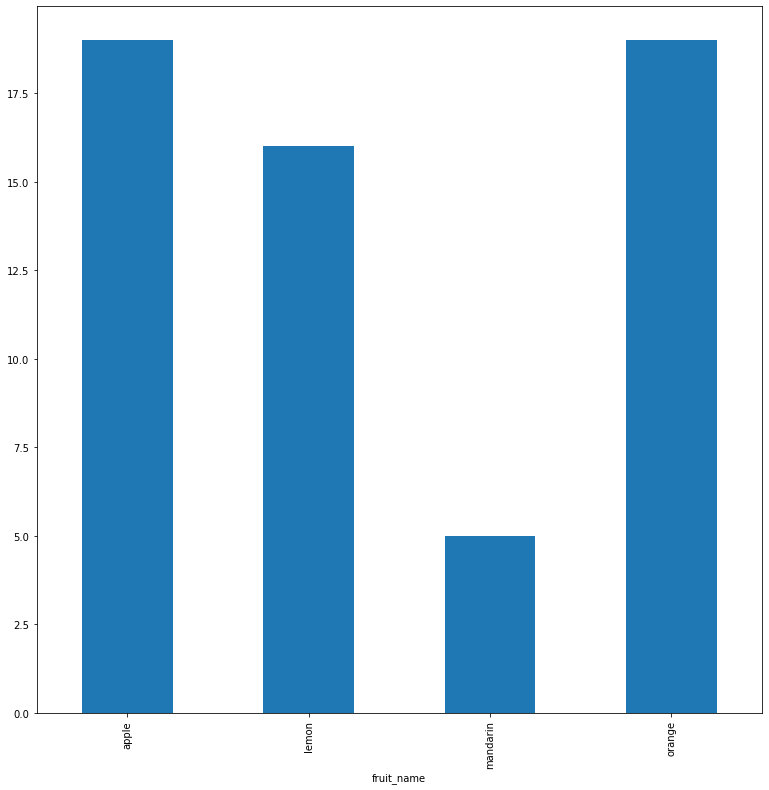

In [7]:
counts.plot(kind="bar")

In [8]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Data Preprocessing

In [9]:
labels_removed = fruits.drop('fruit_label', axis=1)
labels = fruits['fruit_label'].values.reshape(-1, 1)
print(labels_removed.shape, labels.shape)

(59, 6) (59, 1)


mass              AxesSubplot(0.125,0.536818;0.352273x0.343182)
width          AxesSubplot(0.547727,0.536818;0.352273x0.343182)
height               AxesSubplot(0.125,0.125;0.352273x0.343182)
color_score       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

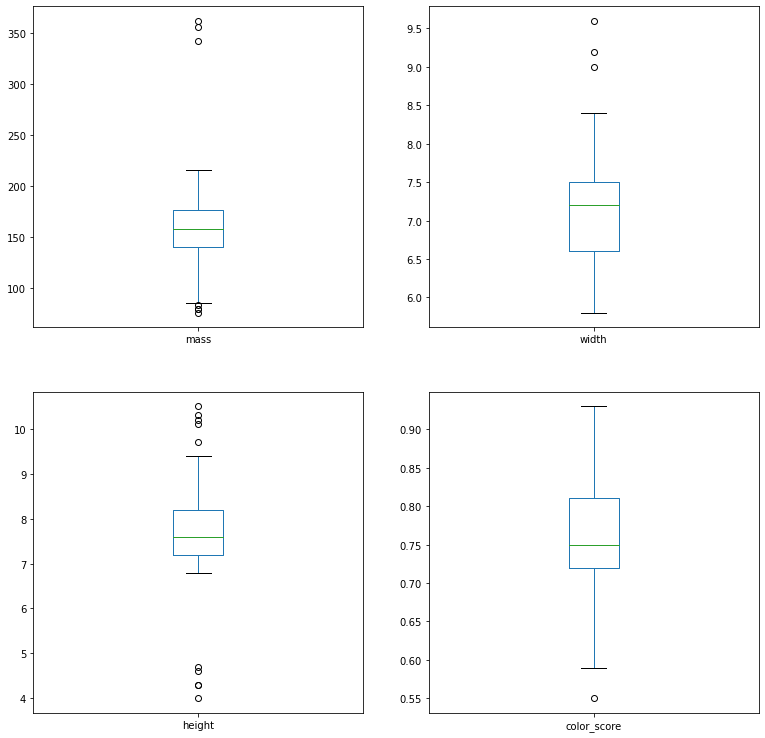

In [10]:
labels_removed.plot(kind='box', subplots=True, layout=(2,2))

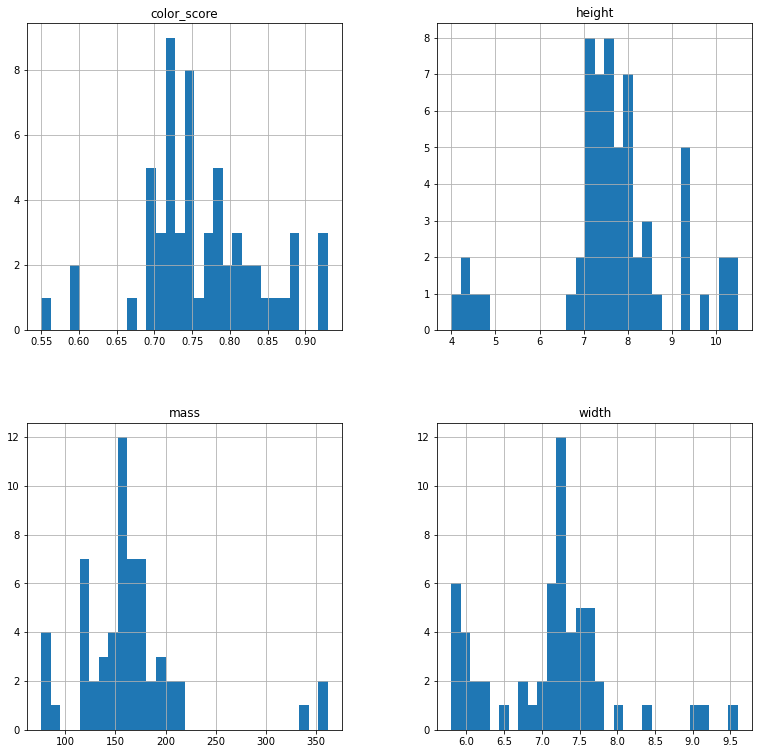

In [11]:
labels_removed.hist(bins=30)
plt.show()

#### Creating a model

In [12]:
feature_names = ["mass", "width", "height", "color_score"]
X=fruits[feature_names]
y=fruits["fruit_label"]

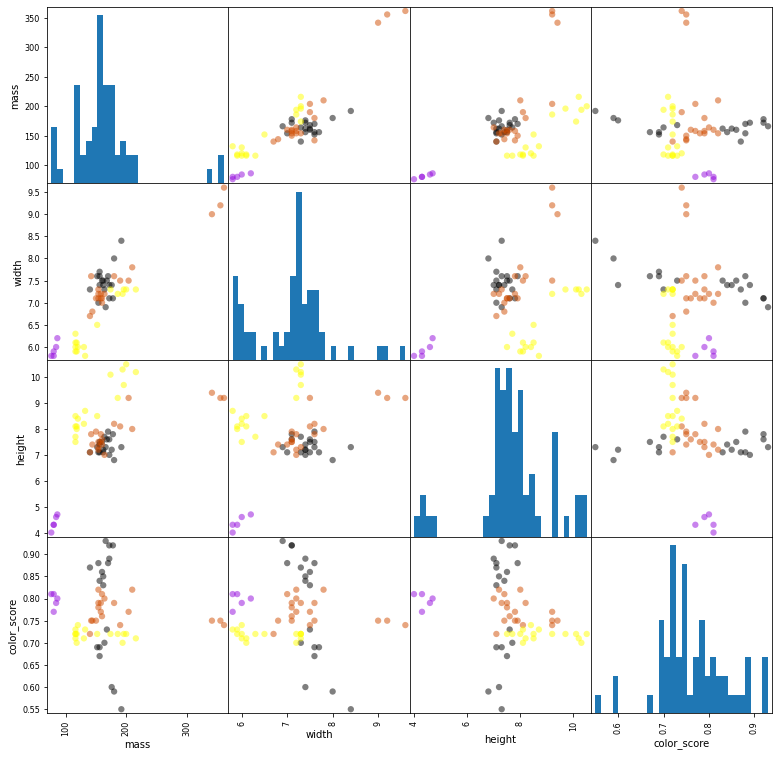

In [13]:
cmap = cm.get_cmap('gnuplot')
pd.plotting.scatter_matrix(X, c=y, marker="o", s=40, hist_kwds={"bins":30}, cmap=cmap, alpha=0.5)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

(44, 4) (15, 4)


In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train); X_test = scaler.transform(X_test)
# fit_transform fits and learns from the data as it transforms.

In [16]:
X_train[:5]

array([[0.27857143, 0.41176471, 0.49230769, 0.72972973],
       [0.35      , 0.44117647, 0.93846154, 0.45945946],
       [0.        , 0.        , 0.        , 0.7027027 ],
       [0.27142857, 0.52941176, 0.50769231, 0.37837838],
       [0.31428571, 0.41176471, 0.46153846, 0.67567568]])

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
logreg.score(X_train, y_train)

0.75

In [19]:
logreg.score(X_test, y_test)

0.4666666666666667

In [20]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

In [21]:
dt.score(X_train, y_train)

1.0

In [22]:
dt.score(X_test, y_test)

0.7333333333333333

In [23]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

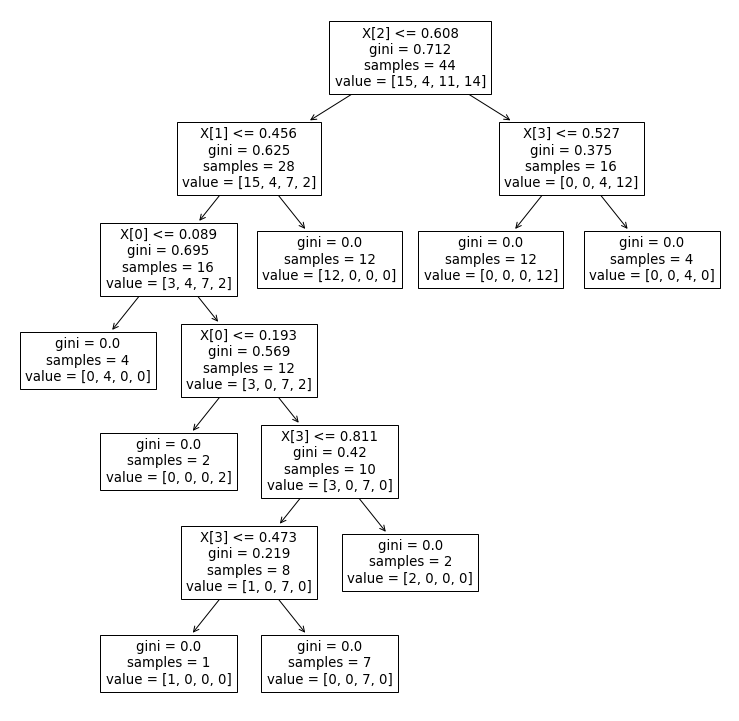

In [35]:
from sklearn import tree
tree.plot_tree(dt)
plt.show()

In [24]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [25]:
knn.score(X_train, y_train)

0.9545454545454546

In [26]:
knn.score(X_test, y_test)

1.0

In [27]:
svc = SVC().fit(X_train, y_train)
svc.score(X_train, y_train)

0.9090909090909091

In [28]:
svc.score(X_test, y_test)

0.8

knn.score(X_test, y_test) is suspicious

In [29]:
pred = knn.predict(X_test)

In [30]:
confusion_matrix(y_test, pred)

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 8, 0],
       [0, 0, 0, 2]], dtype=int64)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



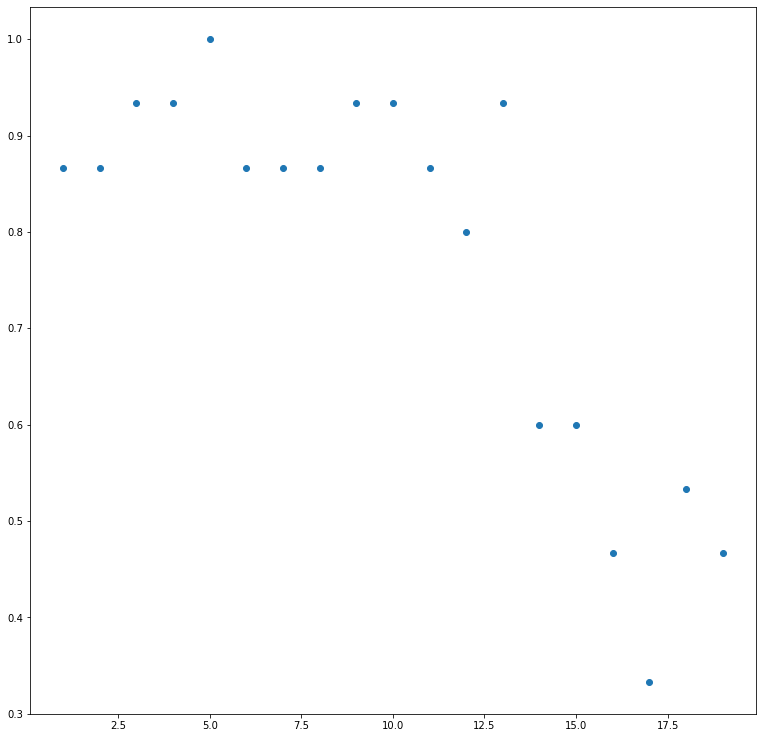

In [34]:
k_range=range(1,20)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
plt.scatter(k_range, score)